In [17]:
import numpy as np
import matplotlib.pyplot as plt
import utilis as u
import importlib
import model as m 

In [20]:
K, d, n = 10, 3072, 1000

filename = '/data_batch_1'
X_train, y_train,Y_train = u.load_data(filename, reshape=False, clipping=True)
meanX = np.mean(X_train,axis=1)
stdX = np.std(X_train,axis=1)
X_train = (X_train-meanX.reshape((len(meanX),1)))/stdX.reshape((len(stdX),1))

filename = '/data_batch_2'
X_val, y_val,Y_val = u.load_data(filename, reshape=False, clipping=True)
X_val = (X_val-meanX.reshape((len(meanX),1)))/stdX.reshape((len(stdX),1))

filename = '/data_batch_3'
X_test, y_test,Y_test = u.load_data(filename, reshape=False, clipping=True)
X_test = (X_test-meanX.reshape((len(meanX),1)))/stdX.reshape((len(stdX),1))

In [21]:
data = {'X_train':X_train, 'Y_train':Y_train, 'y_train':y_train,'X_val':X_val, 'Y_val':Y_val, 'y_val':y_val}

In [36]:
importlib.reload(m)
mlp = m.MLP()
GD_params = {"epochs":10, "n_batch":100, "eta_min":0.001, 'eta_max':0.05, 'ns':500}
mlp.cyclicLearning(data, GD_params, 'nothing', True, False, freq=10)

  0%|          | 0/10 [00:00<?, ?it/s]	 Epoch 0: train_loss = 2.4233004516843932, val_loss = 2.41977845104279,  
 	 train_acc = 0.1028, val_acc = 0.1055
 10%|█         | 1/10 [00:04<00:44,  4.99s/it]	 Epoch 100: train_loss = 1.9253180551081128, val_loss = 1.9782084021915387,  
 	 train_acc = 0.3255, val_acc = 0.3018
 20%|██        | 2/10 [00:09<00:37,  4.73s/it]	 Epoch 200: train_loss = 1.7022204262902483, val_loss = 1.8181302298479811,  
 	 train_acc = 0.4079, val_acc = 0.3631
 30%|███       | 3/10 [00:13<00:32,  4.57s/it]	 Epoch 300: train_loss = 1.5806244128061768, val_loss = 1.7598023311295459,  
 	 train_acc = 0.4509, val_acc = 0.3872
 40%|████      | 4/10 [00:17<00:26,  4.42s/it]	 Epoch 400: train_loss = 1.5260190292799583, val_loss = 1.7624841891712513,  
 	 train_acc = 0.4665, val_acc = 0.3962
 50%|█████     | 5/10 [00:21<00:21,  4.38s/it]	 Epoch 500: train_loss = 1.4406359761757075, val_loss = 1.73365340507046,  
 	 train_acc = 0.5024, val_acc = 0.4096
 60%|██████    | 6/10 [0

In [10]:
# test network
importlib.reload(m)
mlp = m.MLP()
GD_params = {"epochs":10, "n_batch":100, "eta":0.001}
hist = mlp.MiniBatch(data,GD_params,'test',True)


  0%|          | 0/10 [00:00<?, ?it/s]	 Epoch 0: train_loss = 2.429575599446275, val_loss = 2.4260667079286717,  
 	 train_acc = 0.1015, val_acc = 0.1043
 10%|█         | 1/10 [00:04<00:38,  4.23s/it]	 Epoch 1: train_loss = 2.1722377530693757, val_loss = 2.1860343347670312,  
 	 train_acc = 0.2141, val_acc = 0.2123
 20%|██        | 2/10 [00:08<00:34,  4.28s/it]	 Epoch 2: train_loss = 2.083522398511192, val_loss = 2.107887407643722,  
 	 train_acc = 0.2543, val_acc = 0.2454
 30%|███       | 3/10 [00:13<00:30,  4.33s/it]	 Epoch 3: train_loss = 2.0224570558929607, val_loss = 2.0539571219846073,  
 	 train_acc = 0.2834, val_acc = 0.267
 40%|████      | 4/10 [00:18<00:28,  4.77s/it]	 Epoch 4: train_loss = 1.976261402073833, val_loss = 2.0151068133150765,  
 	 train_acc = 0.3032, val_acc = 0.2864
 50%|█████     | 5/10 [00:25<00:26,  5.30s/it]	 Epoch 5: train_loss = 1.939885992472477, val_loss = 1.985120109740847,  
 	 train_acc = 0.3197, val_acc = 0.2982
 60%|██████    | 6/10 [00:31<00:22,  

In [28]:
search.lambdas

[]

In [42]:
importlib.reload(m)
GD_params = {"epochs":10, "n_batch":100, "eta_min":0.001, 'eta_max':0.05, 'ns':500}
search = m.Search(-5, -1,2, 'n_batch',[100],'eta_max',[0.05],epoch=False)
search.random_search(data=data,GDparams=GD_params, n_times=2)


100%|██████████| 10/10 [00:41<00:00,  4.16s/it]

100%|██████████| 10/10 [00:44<00:00,  4.42s/it]

100%|██████████| 10/10 [00:45<00:00,  4.55s/it]

100%|██████████| 10/10 [00:43<00:00,  4.32s/it]

100%|██████████| 10/10 [00:39<00:00,  3.98s/it]


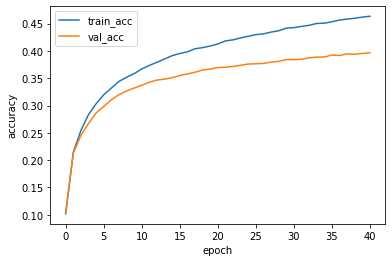

In [4]:
importlib.reload(m)
mlp = m.MLP()
mlp.plot_history(hist.item(),'acc')

In [2]:
experiment = 'test'
epochs = 40
n_batch = 100
eta = 0.001
lambda_ = 0
seed = 42
hist = np.load(f"Models/hist_{experiment}_{epochs}_{n_batch}_{eta}_{lambda_}_{seed}.npy",allow_pickle=True)

In [ ]:
plt.plot(hist.item()['train_acc'])